## Classification - Ensemble Learning

The following tutorial contains Python examples for solving classification problems. You should refer to the Slides Week 9 to understand some of the concepts introduced in this tutorial. 

Classification is the task of predicting a nominal-valued attribute (known as class label) based on the values of other attributes (known as predictor variables). The goals for this tutorial are as follows:
1. To provide examples of using different ensemble learning techniques from the scikit-learn library package.
2. To make a model performance comparison.

Read the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT-ENTER keys simultaneously.

以下教程包含用于解决分类问题的 Python 示例。您应该参考幻灯片第 9 周来了解本教程中介绍的一些概念。 分类是根据其他属性（称为预测变量）的值预测标称值属性（称为类标签）的任务。本教程的目标如下： 1. 提供使用 scikit-learn 库包中的不同集成学习技术的示例。 2.进行模型性能比较。 请仔细阅读下面的分步说明。要执行代码，请单击相应的单元格并同时按 SHIFT-ENTER 键。

## Hold-out Data preparation

In [5]:
from sklearn.model_selection import train_test_split 
# this function provides a single "Hold-Out" Validation.
# 从sklearn（scikit-learn）库的model_selection模块中导入了train_test_split函数。
# 稍后将使用此函数将数据分成训练集和测试集。

import matplotlib.pyplot as plt
# 从matplotlib库中导入了pyplot模块。此模块提供了一个方便的界面，可在Python中创建图表和可视化。

from sklearn.metrics import accuracy_score 
#similar to MAE, we use accuracy_score evaluation metric.
# 从sklearn库的metrics模块中导入了accuracy_score函数。稍后将使用此函数评估机器学习模型的性能。

import pandas as pd
# 导入了pandas库并给它取一个别名pd。Pandas是Python中用于数据操作和分析的流行库。

import numpy as np
# 导入了numpy库并给它取一个别名np。Numpy是Python中用于数值计算的流行库。

data = pd.read_csv('Credit_approval.csv',header='infer')
# 读取一个名为Credit_approval.csv的CSV文件，并将结果存储在一个名为data的变量中。 
# header参数设置为'infer'，这告诉pandas自动从CSV文件的第一行推断标题行。

data.head(5)
# 显示dataDataFrame的前5行。 head函数是pandas DataFrame的一种方法，允许您检查DataFrame的前几行。 
# 5参数指定要显示的行数。

,Age,Debt,YearsEmployed,CreditScore,Income,Approved
0,30.83,0.000,1.25,1,0,+
1,58.67,4.460,3.04,6,560,+
2,24.50,0.500,1.50,0,824,+
3,27.83,1.540,3.75,5,3,+
4,20.17,5.625,1.71,0,0,+


In [6]:
Y = data['Approved'] 
#this is our prediction target
# 创建了一个名为Y的变量，它包含了数据集data中的Approved列。
# Approved列是我们的目标变量，即我们希望我们的机器学习模型能够预测它的值。

X = data.drop(['Approved'],axis=1)
# 创建了一个名为X的变量，它包含了数据集data中除了Approved列以外的所有列。
# 我们将使用这些列作为输入特征，以帮助我们预测目标变量Approved。

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
# 使用train_test_split函数将输入特征X和目标变量Y按照40%的比例划分为测试集，并将其余的60%划分为训练集。
# 使用训练集训练机器学习模型，使用测试集评估模型的性能。
# train_test_split函数会将输入数据集X和Y按照相同的随机方式进行划分，
# 以确保X和Y的数据点在训练集和测试集中的对应关系不变。
# 因此，X_train和Y_train包含相同的数据点，而X_test和Y_test也包含相同的数据点，
# 且X_train和X_test以及Y_train和Y_test的数据点一一对应。

# From original dataset, 0.4 (40%) is used for testing (validation). 
# random_state ensures random split is fixed.

## 0. Decision Tree Classifier

In [7]:
# 训练集和测试集是通过train_test_split函数从原始数据集中随机分割得到的。
# 然后，使用训练集数据来拟合决策树模型，通过决策树对测试集数据进行预测，并计算模型的准确性。
# 最终输出训练集和测试集的准确性评估结果

from sklearn.tree import DecisionTreeClassifier
# 从sklearn库中的tree模块中导入了DecisionTreeClassifier类，它是用于训练决策树分类器的类。

clf = DecisionTreeClassifier(max_depth=2) 
# number estimators is the key parameter
# 创建了一个名为clf的DecisionTreeClassifier对象，并将max_depth参数设置为2。
# max_depth是决策树的最大深度，这是控制模型复杂度的一个重要参数。
# 在这种情况下，决策树的深度不会超过2。

clf = clf.fit(X_train, Y_train)
# 使用训练集X_train和目标变量Y_train来训练clf模型。

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
# 分别使用训练集和测试集的输入特征X_train和X_test来预测目标变量Y的值。
# 具体来说，它使用clf模型来对输入特征进行分类，然后返回预测的目标变量值

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
# 使用accuracy_score函数计算训练集的准确性，即模型对训练集的预测精度。
# accuracy_score函数是一种评估分类模型性能的方法，它将真实标签与预测标签进行比较并计算分类准确率。
# 最后，使用print函数输出结果。
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
# 使用accuracy_score函数计算测试集的准确性，即模型对测试集的预测精度。

Training accuracy is 0.751232
Validation accuracy is 0.727941


## 1. Random Forest 

In [8]:
from sklearn.ensemble import RandomForestClassifier
# 从sklearn库中的ensemble模块中导入了RandomForestClassifier类，它是用于训练随机森林分类器的类。

np.random.seed(1) 
#because the model has random sampling, a random seed can ensure repeated results.

clf = RandomForestClassifier(max_depth=2,n_estimators=500)
# 创建了一个名为clf的RandomForestClassifier对象
# max_depth参数是随机森林中的决策树最大深度，n_estimators参数是用于训练随机森林的决策树的数量。

clf = clf.fit(X_train, Y_train)
# 使用训练集X_train和目标变量Y_train来训练clf模型。

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)
# 分别使用训练集和测试集的输入特征X_train和X_test来预测目标变量Y的值。
# 具体来说，它使用clf模型来对输入特征进行分类，然后返回预测的目标变量值。

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
# 使用accuracy_score函数计算训练集的准确性，即模型对训练集的预测精度。
# accuracy_score函数是一种评估分类模型性能的方法，它将真实标签与预测标签进行比较并计算分类准确率。
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))
# 使用accuracy_score函数计算测试集的准确性，即模型对测试集的预测精度。

Training accuracy is 0.780788
Validation accuracy is 0.761029


## 2. Bagging

In [9]:
from sklearn.ensemble import BaggingClassifier
# 从sklearn库中的ensemble模块中导入了BaggingClassifier类，
# 它是一个集成分类器，它使用多个分类器的预测结果来进行最终的分类决策。

np.random.seed(1)
# 设置了随机数种子，以确保在每次运行代码时得到相同的结果。
# 这是因为BaggingClassifier在训练和预测中使用了随机性，因此随机种子的设置可以确保模型的可重复性。

clf2 = BaggingClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=50) 
# number estimators is the key parameter
# 创建了一个名为clf2的BaggingClassifier对象

# This part is the same
clf2 = clf2.fit(X_train, Y_train)
Y_predTrain = clf2.predict(X_train)
Y_predTest = clf2.predict(X_test)

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.778325
Validation accuracy is 0.735294


## 3. AdaBoost

In [10]:
from sklearn.ensemble import AdaBoostClassifier
# 从sklearn.ensemble模块中导入AdaBoostClassifier类，用于构建AdaBoost模型

np.random.seed(1)
clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=5) 
# number estimators is the key parameter   

clf3 = clf3.fit(X_train, Y_train)
# 将AdaBoost模型拟合到训练数据X_train和Y_train上

Y_predTrain = clf3.predict(X_train)
Y_predTest = clf3.predict(X_test)
# 使用拟合好的模型在训练集（Y_predTrain）和测试集（Y_predTest）上进行预测

print('Training accuracy is %f' % accuracy_score(Y_train, Y_predTrain))
      
print('Validation accuracy is %f' %accuracy_score(Y_test, Y_predTest))

Training accuracy is 0.805419
Validation accuracy is 0.779412


## Model Comparison 

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 70  47]
 [ 18 137]]


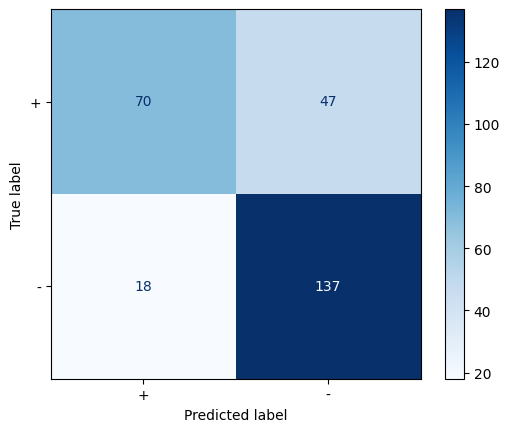

In [11]:
from sklearn.metrics import plot_confusion_matrix

import numpy as np

disp = plot_confusion_matrix(clf, X_test, Y_test,display_labels=['+','-'],values_format = '.0f',cmap=plt.cm.Blues)
# 这行代码调用了上面导入的 plot_confusion_matrix 函数。该函数接受多个参数：
# clf：要评估的分类模型。这通常是在代码的其他地方定义的。
# X_test：要用来评估模型性能的测试数据（自变量）。
# Y_test：测试数据的真实标签（因变量）。
# display_labels：一个包含两个类别标签的列表。在这个例子中，标签分别为 '+' 和 '-'。
# values_format：混淆矩阵中数值的格式。在这个例子中，格式为 '.0f'，意味着数值将以整数形式且没有小数位的形式显示。
# cmap：混淆矩阵使用的颜色图。在这个例子中，使用了 plt.cm.Blues，这是一个预定义的颜色图，来自于 matplotlib 库。
# plot_confusion_matrix 函数返回一个 ConfusionMatrixDisplay 对象，我们将其赋值给变量 disp

np.set_printoptions(precision=1) 
# 设置了 numpy 的打印选项，将精度设置为 1 个小数位。
# 打印一个 numpy 数组，其中包含浮点数，那这些浮点数将只显示一个小数位

print(disp.confusion_matrix) 
# 打印由 plot_confusion_matrix 函数生成的混淆矩阵。
# ConfusionMatrixDisplay 对象的 confusion_matrix 属性包含了实际的矩阵数值

## 4. Class-weight method for imbalanced classification.  类权重法用于不平衡分类

Counter({1: 9000, 0: 1000})


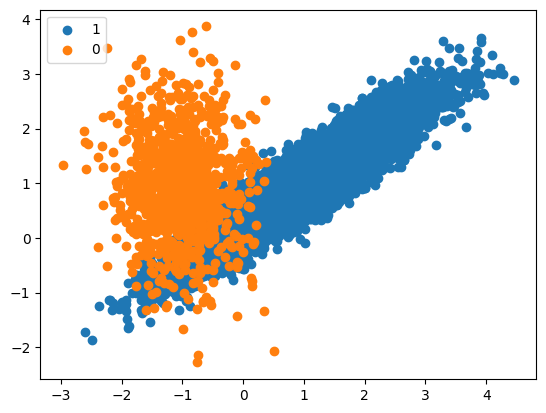

In [12]:
from sklearn.datasets import make_classification  # 用于生成分类数据的函数
from matplotlib import pyplot # 用于可视化数据的库
from numpy import where # 用于筛选数据的函数
# Generate and plot a synthetic imbalanced classification dataset 生成并绘制合成不平衡分类数据集
from collections import Counter # 用于统计数据的函数

# 生成一个二分类不平衡的数据集，并用散点图进行可视化
# define dataset

np.random.seed(1) # 设定随机种子，使得每次生成的数据相同

X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.1], flip_y=0, random_state=2) 
#randomly generate an imbalanced 2-dimensional binary set  随机生成不平衡的二维二进制集
# 这里生成的数据有10000个样本，2个特征，只有一个簇，其中一个类别的比例为0.1，标签没有翻转。

# make_classification函数用于生成分类数据，生成了10000个样本，每个样本包含2个特征。
# n_samples：样本数，n_features：特征数
# 在每个类别中，只生成一个簇(n_clusters_per_class=1)，没有冗余特征(n_redundant=0)
#  n_redundant表示冗余特征数，n_clusters_per_class表示每个类别中的簇数，
# 类别权重为0.1(weights=[0.1])，并且不进行标签翻转(flip_y=0)
# weights表示每个类别的样本比例，flip_y表示标签翻转比例，random_state表示随机种子。


counter = Counter(y)  # 统计标签中各个类别的样本数量
print(counter) #count how many 1 and how many 0，输出统计结果，即两个类别的样本数量


# 用不同颜色的散点图可视化数据集，其中每个点的坐标表示两个特征的取值，颜色表示标签

# 下划线(_)实际上是Python中的一个特殊占位符，表示当前变量的值不会被使用。
# for循环迭代遍历counter字典中的每个键值对(key-value pair)，
# key：类别标签，value：该类别在数据集中出现的次数。
# 由于我们只需要类别标签，而不需要次数，因此使用下划线作为value的占位符。
for label, _ in counter.items():  # 遍历各个类别

    row_ix = where(y == label)[0] 
    # 使用numpy库的where函数在标签数组(y)中查找指定类别的所有样本的索引(row_ix)
    # where函数返回一个由符合条件的元素的索引组成的元组。
    # 因为只需要第一个元素，即符合条件的元素的行索引，因此用[0]取出这个索引数组
    # 这个索引数组(row_ix)包含所有标签等于label的样本在标签数组(y)中的行索引。
    # 在后续代码中，我们可以使用这些行索引来从数据数组(X)中筛选出对应的样本，然后对这些样本进行可视化。

    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    # X[row_ix, 0]表示选取数据数组X中所有行索引为row_ix且列索引为0的元素，即选取所有指定类别样本的第1个特征；
    # X[row_ix, 1]表示选取所有指定类别样本的第2个特征。将这两个特征作为横轴和纵轴，使用scatter函数将这些点绘制出来
    # label参数用于指定该类别在图例中显示的名称，这里使用str(label)将类别标签转换为字符串类型

pyplot.legend() # 显示图例
pyplot.show() # 显示图形

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.4, random_state=1) 
# train_test_split函数用于将数据集划分为训练集和测试集，其中X和y分别为特征和标签，
# test_size表示测试集所占比例，random_state表示随机种子。
# 这里将数据集按4:6的比例划分为训练集和测试集，其中训练集有6000个样本，测试集有4000个样本。

[[ 262  124]
 [   8 3606]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


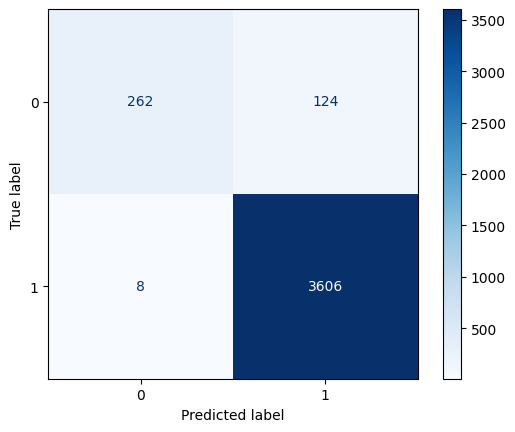

In [13]:
clf=DecisionTreeClassifier(max_depth=2)
# 创建了一个DecisionTreeClassifier类的实例，并将决策树的最大深度设置为2

clf = clf.fit(X_train, Y_train)
# 在训练数据X_train和Y_train上拟合决策树分类器。
# 这意味着分类器被训练来学习数据中的模式和关系，以便在新的、未见过的数据上进行预测。

Y_predTrain = clf.predict(X_train) 
Y_predTest = clf.predict(X_test) 

disp = plot_confusion_matrix(clf, X_test, Y_test,display_labels=['0','1'],values_format = '.0f',cmap=plt.cm.Blues)
# 使用scikit-learn中的plot_confusion_matrix()函数生成一个混淆矩阵图。
# 该函数需要输入训练好的分类器、测试数据(X_test和Y_test)、类别的显示标签（0和1）、
# 格式化数值的格式（'.0f'）和颜色映射(cmap=plt.cm.Blues)。

np.set_printoptions(precision=1) #小数点后位数为1

print(disp.confusion_matrix) 
# direct implementation. the number of 0 labels that were misclassified as 1 is high 
# 直接实施。被错误分类为 1 的 0 个标签的数量很高
# disp是sklearn库中展示混淆矩阵的对象，confusion_matrix是混淆矩阵函数。
# 混淆矩阵是用于可视化分类模型性能的工具，通常由真实标签和预测标签之间的交叉表格组成，以便评估模型的分类效果

这段代码展示了如何在决策树分类器中使用权重调整类别之间的平衡，并生成训练集和测试集上的预测结果以及混淆矩阵。

首先，使用字典weights指定了两个类别的权重，0类别的权重为10，1类别的权重为1，这意味着模型将更关注0类别并尽可能地将更多的数据点划分为0类别。

然后，创建一个深度为2的决策树分类器，并将class_weight参数设置为上面定义的weights字典，以使用给定的类别权重进行分类。

接下来，使用训练数据X_train和标签Y_train训练分类器，并使用训练集和测试集上的数据预测标签。

最后，使用plot_confusion_matrix函数生成测试集上的混淆矩阵，并将其打印出来，以便我们可以了解分类器在每个类别上的表现如何。

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


[[ 376   10]
 [ 532 3082]]


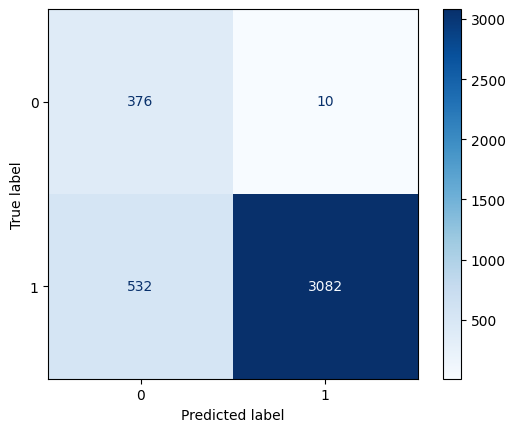

In [14]:
weights = {0:10.0, 1:1.0} 
#the weight put the weight for class "0" to 10 and "1" to 1. So the "0" class is more important

clf = DecisionTreeClassifier(max_depth=2,class_weight=weights)

clf = clf.fit(X_train, Y_train)

Y_predTrain = clf.predict(X_train)
Y_predTest = clf.predict(X_test)

disp = plot_confusion_matrix(clf, X_test, Y_test,display_labels=['0','1'],values_format = '.0f',cmap=plt.cm.Blues)

np.set_printoptions(precision=1)
print(disp.confusion_matrix)

## Summary

### 1. Learn how to build Ensemble Learning Methods
### 2. Learn how to import different classfiers. Please go to the Sklearn website for more details if you want to study more. https://scikit-learn.org/stable/auto_examples/index.html#classification
### 3. Learn how to compute the confusion matrix
### 4. Learn how to compute the class-sensitive classification

# Week 9 - Assignment. Due Week 10

### 1.  Plot confusion matrix of the FOUR classifiers and calculate the accuracy, precision, recall, F-score of these classifiers using the confusion matrix (30 points)

### 2.  Illustrate the differences between these classifiers and compare the model performances. (30 points)

### 3.  Use the credictcard-reduced.csv dataset ([Data description](https://www.kaggle.com/mlg-ulb/creditcardfraud)) and build Five classification models. Please evaluate your model performance (40 points). A list of classification models can be found [here](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html)



### 4.  Bonus credits (extra 1/100 points to Final GPA calculation):

Learn from the documentation for [imbalanced classification](https://imbalanced-learn.org/stable/auto_examples/index.html#general-examples) and use any of the sampling methods to deal with the credictcard-reduced.csv dataset. Evaluate model performance.

# 1.

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


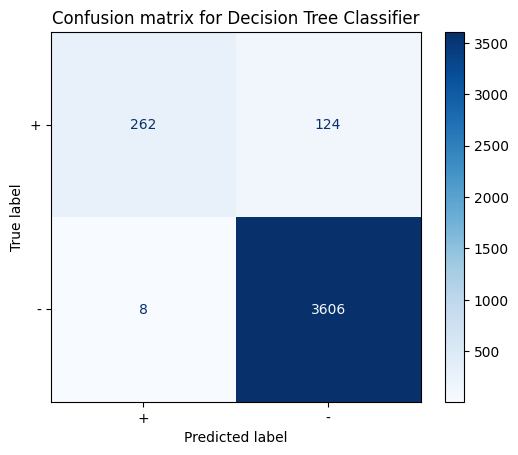

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix

# Define the pipeline for the decision tree model
clf_dt = make_pipeline(DecisionTreeClassifier(max_depth=2))

# Train and evaluate the model
clf_dt.fit(X_train, Y_train)
disp_dt = plot_confusion_matrix(clf_dt, X_test, Y_test, display_labels=['+','-'], values_format='.0f', cmap=plt.cm.Blues)
plt.title("Confusion matrix for Decision Tree Classifier")
plt.show()

In [16]:
# the accuracy, precision, recall, F-score of Decision Tree
# accuracy = (a+d)/(a+b+c+d)
# precision = a/(a+c)
# recall = a/(a+b)
# f = (2*r*p)/(r+p) = 2a/(2a+b+c)

from sklearn.metrics import classification_report

Y_pred_dt = clf_dt.predict(X_test)

# Print the classification report for the Decision Tree model
print("Classification Report for Decision Tree:")
print(classification_report(Y_test, Y_pred_dt, target_names=['-', '+']))

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           -       0.97      0.68      0.80       386
           +       0.97      1.00      0.98      3614

    accuracy                           0.97      4000
   macro avg       0.97      0.84      0.89      4000
weighted avg       0.97      0.97      0.96      4000



/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


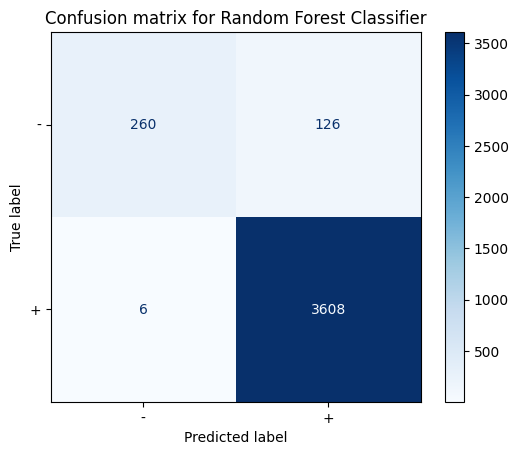

Classification Report for Random Forest:
              precision    recall  f1-score   support

           -       0.98      0.67      0.80       386
           +       0.97      1.00      0.98      3614

    accuracy                           0.97      4000
   macro avg       0.97      0.84      0.89      4000
weighted avg       0.97      0.97      0.96      4000



In [17]:
# 1. Random Forest
# Define the pipeline for the random forest model
clf_rf = make_pipeline(RandomForestClassifier(n_estimators=100, max_depth=2))

# Train and evaluate the model
clf_rf.fit(X_train, Y_train)
disp_rf = plot_confusion_matrix(clf_rf, X_test, Y_test, display_labels=['-', '+'], values_format='.0f', cmap=plt.cm.Blues)
plt.title("Confusion matrix for Random Forest Classifier")
plt.show()

Y_pred_rf = clf_rf.predict(X_test)

# Print the classification report for the Random Forest model
print("Classification Report for Random Forest:")
print(classification_report(Y_test, Y_pred_rf, target_names=['-', '+']))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


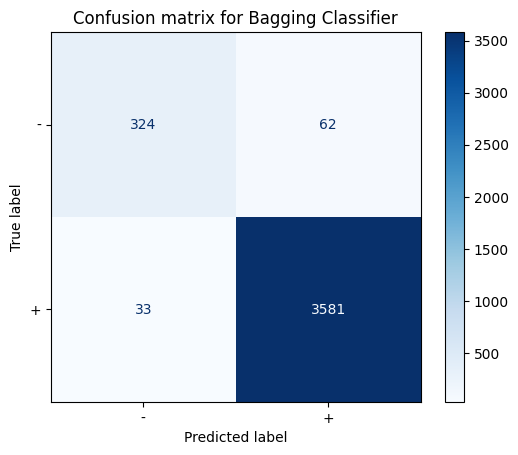

Classification Report for Bagging:
              precision    recall  f1-score   support

           -       0.91      0.84      0.87       386
           +       0.98      0.99      0.99      3614

    accuracy                           0.98      4000
   macro avg       0.95      0.92      0.93      4000
weighted avg       0.98      0.98      0.98      4000



In [18]:
# 2. Bagging

# Define the pipeline for the bagging model
clf_bg = make_pipeline(BaggingClassifier(n_estimators=100))

# Train and evaluate the model
clf_bg.fit(X_train, Y_train)
disp_bg = plot_confusion_matrix(clf_bg, X_test, Y_test, display_labels=['-', '+'], values_format='.0f', cmap=plt.cm.Blues)
plt.title("Confusion matrix for Bagging Classifier")
plt.show()

Y_pred_bg = clf_bg.predict(X_test)

# Print the classification report for the Bagging model
print("Classification Report for Bagging:")
print(classification_report(Y_test, Y_pred_bg, target_names=['-', '+']))


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


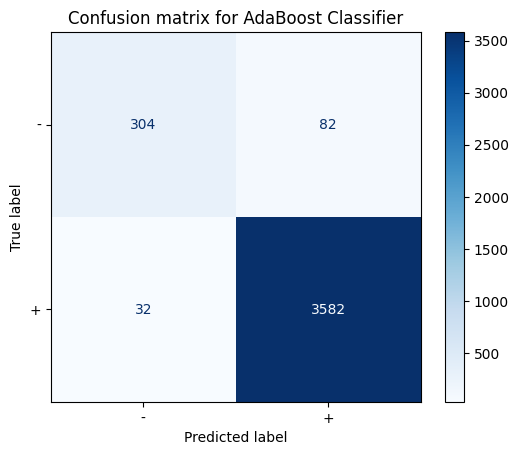

Classification Report for AdaBoost:
              precision    recall  f1-score   support

           -       0.90      0.79      0.84       386
           +       0.98      0.99      0.98      3614

    accuracy                           0.97      4000
   macro avg       0.94      0.89      0.91      4000
weighted avg       0.97      0.97      0.97      4000



In [19]:
# 3. AdaBoost

# Define the pipeline for the adaboost model
clf_ab = make_pipeline(AdaBoostClassifier(n_estimators=100))

# Train and evaluate the model
clf_ab.fit(X_train, Y_train)
disp_ab = plot_confusion_matrix(clf_ab, X_test, Y_test, display_labels=['-', '+'], values_format='.0f', cmap=plt.cm.Blues)
plt.title("Confusion matrix for AdaBoost Classifier")
plt.show()

Y_pred_ab = clf_ab.predict(X_test)

# Print the classification report for the AdaBoost model
print("Classification Report for AdaBoost:")
print(classification_report(Y_test, Y_pred_ab, target_names=['-', '+']))


# 2.
High precision and recall scores for the positive class ('+') with scores ranging from 0.97 to 0.98. However, there is a difference in the performance of the classifiers for the negative class ('-').

The Decision Tree and Random Forest classifiers have a lower recall score for the negative class (0.68) compared to the Bagging (0.84) and AdaBoost (0.79) classifiers. This suggests that Decision Tree and Random Forest classifiers are less effective in correctly identifying the negative class compared to the other two classifiers.

Overall, the Bagging classifier performs the best among the four classifiers with an accuracy of 0.98 and high precision and recall scores for both positive and negative classes. The AdaBoost classifier also performs well with an accuracy of 0.97 and high precision and recall scores for the positive class, but a lower recall score for the negative class. The Decision Tree and Random Forest classifiers have good performance for the positive class but are less effective in identifying the negative class.

# 3.

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

cr = pd.read_csv('creditcard-reduced.csv')

X = cr.drop('Class', axis=1)
y = cr['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("K-Nearest Neighbors:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

K-Nearest Neighbors:

Accuracy:  0.9992369906912865

Precision:  1.0

Recall:  0.9425287356321839

F1 Score:  0.9704142011834319

[[6466    0]

 [   5   82]]


In [26]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Decision Tree:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


Decision Tree:

Accuracy:  0.9990843888295438

Precision:  0.9550561797752809

Recall:  0.9770114942528736

F1 Score:  0.9659090909090908

[[6462    4]

 [   2   85]]


In [27]:
# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Random Forest:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Random Forest:

Accuracy:  0.9998473981382573

Precision:  1.0

Recall:  0.9885057471264368

F1 Score:  0.9942196531791908

[[6466    0]

 [   1   86]]


In [28]:
# Support Vector Classifier with linear kernel
svc_linear = SVC(kernel='linear', random_state=42)
svc_linear.fit(X_train, y_train)
y_pred = svc_linear.predict(X_test)
print("SVC with linear kernel:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVC with linear kernel:

Accuracy:  0.9980161757973447

Precision:  1.0

Recall:  0.8505747126436781

F1 Score:  0.9192546583850931

[[6466    0]

 [  13   74]]


In [29]:
# Multi-layer Perceptron classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("MLPClassifier:")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred))
print("Recall: ", recall_score(y_test, y_pred))
print("F1 Score: ", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

MLPClassifier:

Accuracy:  0.9884022585075538

Precision:  1.0

Recall:  0.12643678160919541

F1 Score:  0.22448979591836737

[[6466    0]

 [  76   11]]


1. K-Nearest Neighbors: The accuracy of this model is very high (0.9992) and the precision is also very high (1.0), meaning that almost all predictions are correct. The recall was also relatively high (0.9425), meaning that 94.25% of transactions were correctly predicted. the F1 score was also high (0.9704), indicating that the model had a good balance between accuracy and recall. The confusion matrix shows that only 5 transactions that were actually fraudulent were incorrectly predicted as normal transactions. Therefore, the performance of this model is excellent.

2. Decision Tree: This model is highly accurate (0.9991), but slightly less accurate than K-Nearest Neighbors. Accuracy is relatively high (0.9551) but lower than K-Nearest Neighbors. The recall was very high (0.9770), indicating that 97.70% of all transactions that were actually fraudulent were correctly predicted. the F1 score was high (0.9659), indicating that the model strikes a good balance between precision and recall. The confusion matrix shows that only two transactions that were actually fraudulent were incorrectly predicted as normal transactions, while four transactions that were actually normal were incorrectly predicted as fraudulent transactions. Therefore, the performance of this model is also excellent.

3. Random Forest: This model has a very high accuracy (0.9998), which is higher than both K-Nearest Neighbors and Decision Tree. The precision is very high (1.0), meaning that in all transactions predicted to be fraudulent, all predictions are correct. The recall was relatively high (0.9885), indicating that 98.85% of all transactions that were actually fraudulent were correctly predicted. the F1 score was also high (0.9942), indicating that the model strikes a good balance between precision and recall. The confusion matrix shows that only 1 transaction that was actually fraudulent was incorrectly predicted as a normal transaction. Therefore, the performance of this model is the best.



4. SVC: The accuracy of this model is high (0.9980), but lower than all three previous models. The precision is very high (1.0), meaning that of all the transactions predicted to be fraudulent, all predictions are correct. However, the recall was relatively low (0.8506), suggesting that only 85.06% of all transactions that were actually fraudulent were correctly predicted. the F1 score was also lower than the previous three models (0.9193). The confusion matrix shows that 13 transactions that were actually fraudulent were incorrectly predicted as normal transactions. Therefore, the performance of this model is slightly worse than the previous three models

5. MLPClassifi: Multi-layer Perceptron classifier: The accuracy of this model is relatively low (0.9884), lower than all four previous models. The precision is very high (1.0), meaning that in all transactions predicted to be fraudulent, all predictions are correct. However, the recall was very low (0.1264), indicating that only 12.64% of all transactions that were actually fraudulent were correctly predicted. the F1 score was also very low (0.2245). The confusion matrix showed that 76 transactions that were actually fraudulent were incorrectly predicted as normal transactions. Therefore, this model has the worst performance.

Overall, these models all performed very well in terms of accuracy, but differed in terms of precision, recall and F1 scores.Random Forest was the best model as it performed very well on all metrics and had only 1 incorrect prediction in the confusion matrix.K-Nearest Neighbors and Decision Tree also SVC with linear kernel was slightly worse, while MLPClassifier was the worst performer.

# 4.

In [38]:
from collections import Counter

import pandas as pd
from imblearn.datasets import fetch_datasets
from imblearn.under_sampling import NearMiss
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import make_pipeline

In [39]:
# Print the class distribution of the training set
print("Class distribution of the training set before resampling:", Counter(y_train))

Class distribution of the training set before resampling: Counter({0: 25806, 1: 405})


In [40]:
# Define the pipeline
pipeline = make_pipeline(
    NearMiss(version=2),
    StandardScaler(),
    LogisticRegression(random_state=42)
)

In [41]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('nearmiss', NearMiss(version=2)),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(random_state=42))])

In [42]:
# Make predictions on the testing data
y_pred = pipeline.predict(X_test)

In [43]:
# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       1.00      0.99      1.00      6466

           1       0.69      0.98      0.81        87



    accuracy                           0.99      6553

   macro avg       0.84      0.99      0.90      6553

weighted avg       1.00      0.99      0.99      6553




In [44]:
# Print the class distribution of the testing set after resampling
print("Class distribution of the testing set after resampling:", Counter(y_pred))

Class distribution of the testing set after resampling: Counter({0: 6429, 1: 124})


<Axes: xlabel='Class', ylabel='count'>

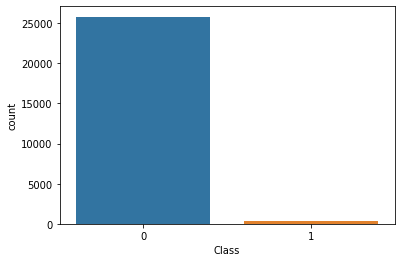

In [45]:
import seaborn as sns

sns.countplot(x=y_train)

Based on the results it can be seen that the model performs very well on normal transactions (category 0) with very high precision, recall and f1-score. however, on fraudulent transactions (category 1) the model performs poorly, with high recall but low precision and relatively low f1-score. Therefore, when dealing with highly unbalanced datasets, using standard evaluation metrics (e.g. precision, recall and f1-score) alone may not provide a full picture of the model's performance. Appropriate evaluation metrics and sampling methods need to be used in conjunction with specific application scenarios to address the problem of data imbalance.